# Transformada Wavelet

### Sinal de audio
Vamos usar o biblioteca "librosa" para caregar o audio e fazer a reprodução tanto do audio como a representação gráfica dos sinais.

In [270]:
import librosa
sig, sr = librosa.load('audio/audio1.wav', duration=5.0)
print ("Taxa de amostragem: ", sr)
print ("Numero de amostras: ", sig.shape)

Taxa de amostragem:  22050
Numero de amostras:  (110250,)


In [271]:
import IPython.display as ipd
ipd.Audio(sig, rate=sr) # load a local WAV file

In [272]:
%matplotlib inline
import seaborn # optional
import matplotlib.pyplot as plt
import librosa.display

plt.rcParams['font.family'] = ['DejaVu Sans']

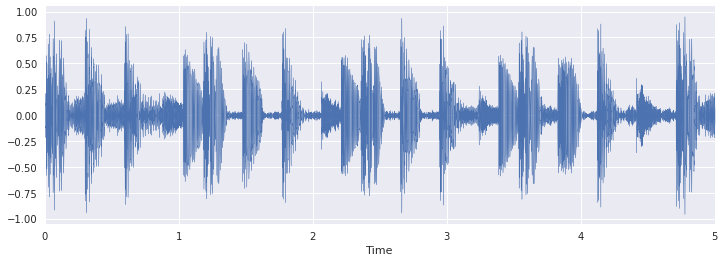

In [273]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(sig, sr=sr)

### Ruido branco gaussiano 

In [274]:
import numpy as np
import random
import matplotlib.patches as mpatches

mean = 1
std = 1 
num_noise = len(sig)
noise = np.random.normal(mean, std, size=num_noise)

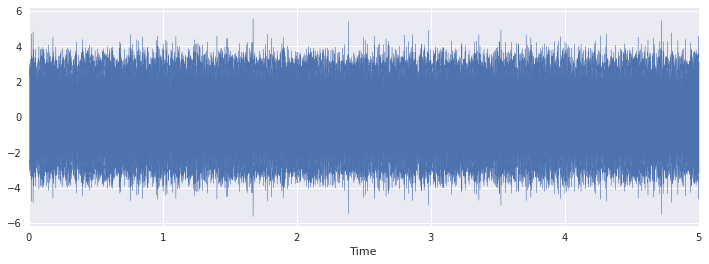

In [275]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(noise, sr)

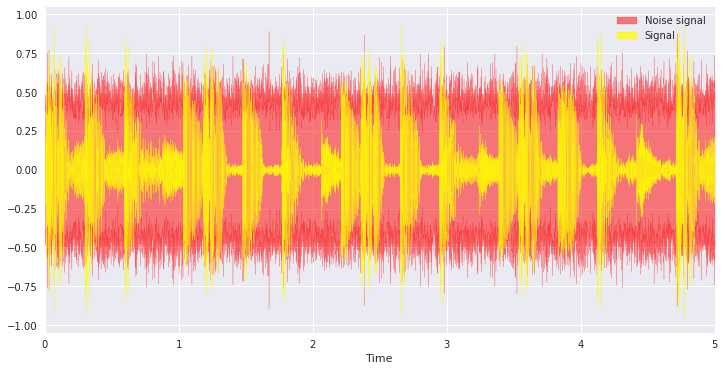

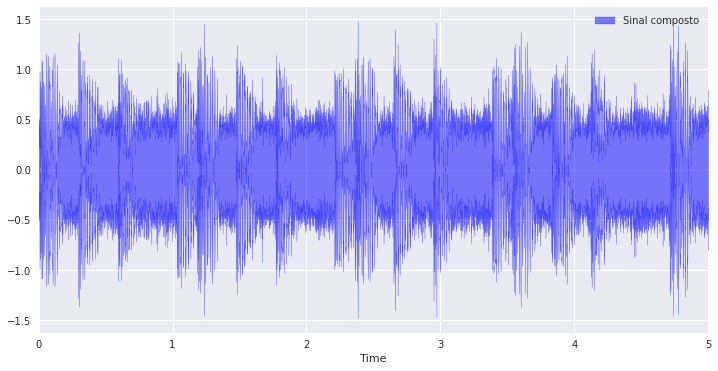

In [276]:
fator_noise = 0.16 #SNR10 ≃ 0.05;  SNR0 ≃ 0.16 SNR-10 ≃ 0.5
snr_noise = fator_noise*noise
result = sig + snr_noise

plt.figure(figsize=(12, 6))
legend_noise = mpatches.Patch(color='red', label='Noise signal', alpha= 0.5)
legend_signal = mpatches.Patch(color='yellow', label='Signal', alpha=0.8)
plt.legend(handles=[legend_noise, legend_signal])

librosa.display.waveplot(snr_noise, sr=sr, color="red", alpha=0.5)
librosa.display.waveplot(sig, sr=sr, color="yellow", alpha=0.8)

plt.figure(figsize=(12, 6))
legend_result = mpatches.Patch(color='blue', label='Sinal composto', alpha=0.5)
plt.legend(handles=[legend_result])

librosa.display.waveplot(result, sr=sr, color="blue", alpha=0.5)

In [277]:
librosa.output.write_wav('audio/saida.wav', result, sr)
x, sr = librosa.load('audio/saida.wav')
print ("Taxa de amostragem: ", sr)
print ("Numero de amostras: ", len(x))

Taxa de amostragem:  22050
Numero de amostras:  110250


In [279]:
ipd.Audio(x, rate=sr) # load a local WAV file

### Calculo da SNR

In [280]:
avgPower1 = 0
avgPower2 = 0
for i in sig:
    avgPower1 += i ** 2
for i in snr_noise:
    avgPower2 += i ** 2

print (10 * np.log10(avgPower1 / len(sig) / (avgPower2 / len(snr_noise))))

0.0579390687603
